In [1]:
# !pip install tensorflow tensorflow-metal opencv-python
# !pip list

In [2]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for category in os.listdir(data_dir):
    if category == '.DS_Store' : continue
    for image in os.listdir(os.path.join(data_dir, category)):
        image_path = os.path.join(data_dir, category, image)
        try:
            img = cv2.imread(image_path)
            if imghdr.what(image_path) not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print(e)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(validation_split=0.3)
train = image_data_generator.flow_from_directory(directory=data_dir, target_size=(256,256), batch_size=16, class_mode='categorical', subset='training')
val = image_data_generator.flow_from_directory(directory=data_dir, target_size=(256,256), batch_size=16, class_mode='categorical', subset='validation')

Found 469 images belonging to 3 classes.
Found 199 images belonging to 3 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

model = Sequential()

# model.add(Dense(len(train.classes), activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(128, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(len(train.class_indices), activation='sigmoid'))

model.compile('adam', loss=tf.keras.losses.categorical_crossentropy , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

2025-01-11 01:22:52.874016: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-01-11 01:22:52.874063: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-11 01:22:52.874067: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-11 01:22:52.874328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-11 01:22:52.874359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
logdir = 'logs'
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [9]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/20


2025-01-11 01:22:53.376094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 3.9312 - accuracy: 0.4925

2025-01-11 01:22:56.388401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 108ms/step - loss: 3.9312 - accuracy: 0.4925 - val_loss: 2.2943 - val_accuracy: 0.5678
Epoch 2/20
30/30 [==============================] - 3s 101ms/step - loss: 1.2314 - accuracy: 0.6482 - val_loss: 0.7371 - val_accuracy: 0.7688
Epoch 3/20
30/30 [==============================] - 3s 101ms/step - loss: 0.4495 - accuracy: 0.8358 - val_loss: 0.5960 - val_accuracy: 0.7839
Epoch 4/20
30/30 [==============================] - 3s 100ms/step - loss: 0.3187 - accuracy: 0.8721 - val_loss: 0.3507 - val_accuracy: 0.8744
Epoch 5/20
30/30 [==============================] - 3s 103ms/step - loss: 0.2151 - accuracy: 0.9254 - val_loss: 0.2911 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 3s 100ms/step - loss: 0.1093 - accuracy: 0.9595 - val_loss: 0.3071 - val_accuracy: 0.9146
Epoch 7/20
30/30 [==============================] - 3s 100ms/step - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.3495 - val_accuracy: 0.9045
Epoch 8/20
30/30 

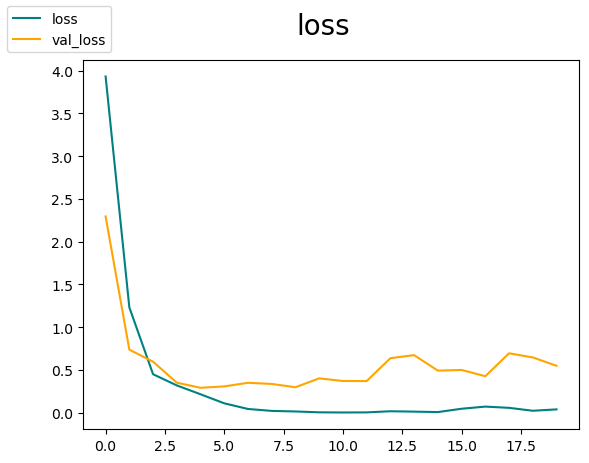

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
fig.legend(loc='upper left')
plt.show()

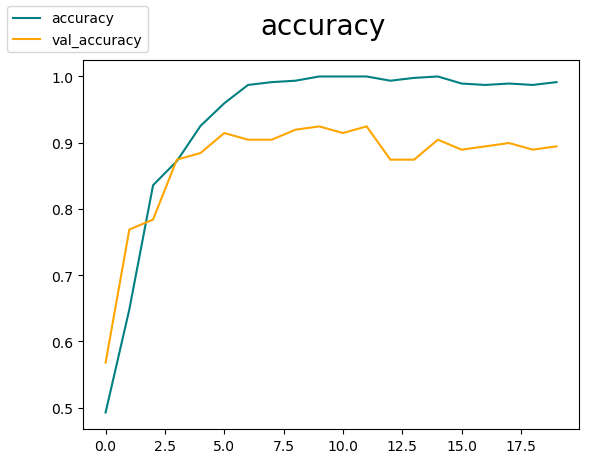

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
fig.legend(loc='upper left')
plt.show()

In [12]:
test = ImageDataGenerator().flow_from_directory(directory='test', target_size=(256,256), batch_size=16, class_mode='categorical')

Found 121 images belonging to 3 classes.


In [17]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

acc = Accuracy()
pre = Precision()
re = Recall()


for i, (x,y) in enumerate(test):
    y_predict = tf.argmax(model.predict(x))
    acc.update_state(tf.argmax(y), y_predict)
    pre.update_state(tf.argmax(y), y_predict)
    re.update_state(tf.argmax(y), y_predict)
    if i >= len(train): break

print(f'Precision : {pre.result()} \nRecall : {re.result()} \nAccuracy : {acc.result()}')


1/1 [==============================] - 0s 13ms/step
Precision : 0.8219178318977356 
Recall : 0.9836065769195557 
Accuracy : 0.44086021184921265


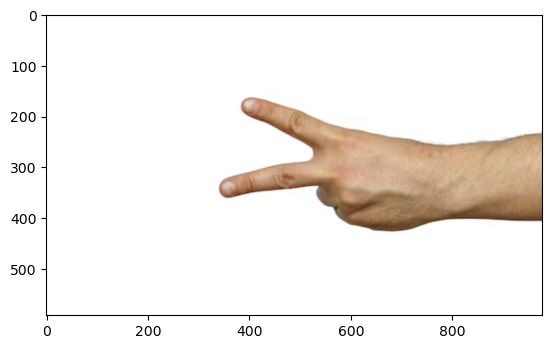

In [29]:
sample_image_path = os.path.join('/Users/abbazs/Projects/ML-Data-Science/enviroment_1/rock_paper_scissor', 'sample_image_test.png')
image_bgr = cv2.imread(sample_image_path)
image_rgb = plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))

In [30]:
scaled_image = tf.image.resize(image_bgr, (256,256))
y_predict = model.predict(np.expand_dims(scaled_image, axis=0))
for key,val in train.class_indices.items():
    if val == np.argmax(y_predict): 
        print(key)

1/1 [==============================] - 0s 16ms/step
scissors


In [31]:
model.save(os.path.join('models', 'rockpaperscissor.h5'))